# Togo Solar Dataset – Exploratory Data Analysis

## Dataset: togo-dapaong.csv

This notebook performs comprehensive Exploratory Data Analysis (EDA) for the Togo solar dataset, including:

- **Summary statistics**: Overview of dataset structure and basic statistics
- **Missing values**: Identification and analysis of missing data
- **Outlier detection**: Detection of anomalous values using statistical methods
- **Data cleaning**: Fixing physically impossible values and handling outliers
- **Time-series visualization**: Visualization of key variables over time
- **Cleaning impact**: Analysis of sensor cleaning events on module performance
- **Correlations**: Understanding relationships between variables
- **Wind analysis**: Wind speed and direction patterns
- **Temperature/humidity relationships**: Environmental factor analysis
- **Bubble chart**: Multi-variable visualization



In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Set default plot style
plt.style.use("ggplot")
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")



Libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.3.4
Matplotlib version: 3.10.7
Seaborn version: 0.13.2


## 3. Load Dataset

Load the raw dataset and prepare it for analysis.


In [ ]:
# Load the dataset
df = pd.read_csv("../data/raw/togo-dapaong_qc.csv")

# Convert Timestamp to datetime and set as index
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"\nDate range: {df.index.min()} to {df.index.max()}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nFirst few rows:")
df.head()



Dataset shape: (525600, 18)

Date range: 2021-10-25 00:01:00 to 2022-10-25 00:00:00

Columns: ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']

First few rows:


GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
Timestamp                                                                 
2021-10-25 00:01:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
2021-10-25 00:02:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2021-10-25 00:03:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
2021-10-25 00:04:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
2021-10-25 00:05:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

                     WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  \
Timestamp                                                                    
2021-10-25 00:01:00      0.4  227.6      1.1  977         0            0.0   
2021-10-25 00:02:00      0.4  229.3      0.7  977         0            0.0   
2021-10-25 00:03:00      0.3  228.5      2.9  977         0            0.0   
2021-10-25 00:04:00      0.3  229.1      4.6  977         0            0.0   
2021-10-25 00:05:00      0.4  227.5      1.6  977         0            0.0   

                     TModA  TModB  Comments  
Timestamp                                    
2021-10-25 00:01:00   24.7   24.4       NaN  
2021-10-25 00:02:00   24.7   24.4       NaN  
2021-10-25 00:03:00   24.7   24.4       NaN  
2021-10-25 00:04:00   24.7   24.4       NaN  
2021-10-25 00:05:00   24.7   24.4       NaN

## 4. Summary Statistics

Explore the dataset structure, data types, and basic statistics.


In [3]:
# Dataset info
print("=" * 80)
print("DATASET INFORMATION")
print("=" * 80)
df.info()



DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525600 entries, 2021-10-25 00:01:00 to 2022-10-25 00:00:00
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   GHI            525600 non-null  float64
 1   DNI            525600 non-null  float64
 2   DHI            525600 non-null  float64
 3   ModA           525600 non-null  float64
 4   ModB           525600 non-null  float64
 5   Tamb           525600 non-null  float64
 6   RH             525600 non-null  float64
 7   WS             525600 non-null  float64
 8   WSgust         525600 non-null  float64
 9   WSstdev        525600 non-null  float64
 10  WD             525600 non-null  float64
 11  WDstdev        525600 non-null  float64
 12  BP             525600 non-null  int64  
 13  Cleaning       525600 non-null  int64  
 14  Precipitation  525600 non-null  float64
 15  TModA          525600 non-null  float64
 16  TModB          52560

In [4]:
# Descriptive statistics
print("=" * 80)
print("DESCRIPTIVE STATISTICS")
print("=" * 80)
df.describe()



DESCRIPTIVE STATISTICS


GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.200000      26.500000       1.400000   
50%         4.300000      27.200000      59.300000       2.200000   
75%       411.000000      31.100000      80.800000       3.200000   
max      1367.000000      41.400000      99.800000      16.100000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        3.229490       0.557740     161.741845      10.559568   
std         1.882565       0.268923      91.877217       5.915490   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.900000       0.400000      74.800000       6.900000   
50%         2.900000       0.500000     199.100000      10.800000   
75%         4.400000       0.700000     233.500000      14.100000   
max        23.100000       4.700000     360.000000      86.900000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      975.915242       0.000535       0.001382      32.444403   
std         2.153977       0.023116       0.026350      10.998334   
min       968.000000       0.000000       0.000000      13.100000   
25%       975.000000       0.000000       0.000000      23.900000   
50%       976.000000       0.000000       0.000000      28.400000   
75%       977.000000       0.000000       0.000000      40.600000   
max       983.000000       1.000000       2.300000      70.400000   

               TModB  Comments  
count  525600.000000       0.0  
mean       33.543330       NaN  
std        12.769277       NaN  
min        13.100000       NaN  
25%        23.600000       NaN  
50%        28.400000       NaN  
75%        43.000000       NaN  
max        94.600000       NaN

In [5]:
# Missing values analysis
print("=" * 80)
print("MISSING VALUES ANALYSIS")
print("=" * 80)

missing_count = df.isna().sum()
missing_pct = (df.isna().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage': missing_pct
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
else:
    print("No missing values found in the dataset.")

# Display total missing values
print(f"\nTotal missing values: {df.isna().sum().sum()}")
print(f"Total cells: {df.shape[0] * df.shape[1]}")
print(f"Percentage of missing data: {(df.isna().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")

# Flag columns with >5% missing values
print("\n" + "=" * 80)
print("COLUMNS WITH >5% MISSING VALUES")
print("=" * 80)
high_missing = missing_df[missing_df['Missing Percentage'] > 5]
if len(high_missing) > 0:
    print("\n⚠️  Columns with >5% missing values:")
    for col in high_missing.index:
        print(f"  - {col}: {high_missing.loc[col, 'Missing Percentage']:.2f}%")
else:
    print("\n✓ No columns with >5% missing values")



MISSING VALUES ANALYSIS
          Missing Count  Missing Percentage
Comments         525600               100.0

Total missing values: 525600
Total cells: 9460800
Percentage of missing data: 5.56%

COLUMNS WITH >5% MISSING VALUES

⚠️  Columns with >5% missing values:
  - Comments: 100.00%


### Observations from Summary Statistics

**Columns with Missing Values:**
- Identify any columns with missing values and their percentages
- Comments column likely contains mostly NaN values (text annotations)

**Suspicious Ranges:**
- **Radiation columns (GHI, DNI, DHI)**: Negative values are physically impossible (radiation cannot be negative)
- **Relative Humidity (RH)**: Should be between 0-100%
- **Wind Speed (WS)**: Should be non-negative
- **Module outputs (ModA, ModB)**: Should be non-negative

**Data Quality Notes:**
- Check for unrealistic temperature ranges
- Verify wind direction (WD) is within 0-360 degrees
- Examine pressure (BP) for reasonable atmospheric pressure ranges


## 5. Data Cleaning

Perform data cleaning to fix physically impossible values and handle outliers.


In [6]:
# Create a copy for cleaning
df_clean = df.copy()

print("=" * 80)
print("DATA CLEANING - FIXING PHYSICALLY IMPOSSIBLE VALUES")
print("=" * 80)

# Store original counts for reporting
original_shape = df_clean.shape[0]

# 1. Fix radiation columns (GHI, DNI, DHI) - clip to >= 0
radiation_cols = ['GHI', 'DNI', 'DHI']
for col in radiation_cols:
    negative_count = (df_clean[col] < 0).sum()
    if negative_count > 0:
        print(f"\n{col}: Found {negative_count} negative values ({(negative_count/len(df_clean))*100:.2f}%)")
        df_clean[col] = df_clean[col].clip(lower=0)

# 2. Fix Relative Humidity (RH) - clip to 0-100
rh_negative = (df_clean['RH'] < 0).sum()
rh_over_100 = (df_clean['RH'] > 100).sum()
if rh_negative > 0:
    print(f"\nRH: Found {rh_negative} values below 0")
if rh_over_100 > 0:
    print(f"RH: Found {rh_over_100} values above 100")
df_clean['RH'] = df_clean['RH'].clip(lower=0, upper=100)

# 3. Fix wind speed columns - ensure non-negative
wind_cols = ['WS', 'WSgust']
for col in wind_cols:
    negative_count = (df_clean[col] < 0).sum()
    if negative_count > 0:
        print(f"\n{col}: Found {negative_count} negative values")
        df_clean[col] = df_clean[col].clip(lower=0)

# 4. Fix module outputs - ensure non-negative
module_cols = ['ModA', 'ModB']
for col in module_cols:
    negative_count = (df_clean[col] < 0).sum()
    if negative_count > 0:
        print(f"\n{col}: Found {negative_count} negative values")
        df_clean[col] = df_clean[col].clip(lower=0)

print("\n" + "=" * 80)
print("Physical value corrections completed!")
print("=" * 80)



DATA CLEANING - FIXING PHYSICALLY IMPOSSIBLE VALUES

GHI: Found 257385 negative values (48.97%)

Physical value corrections completed!


In [7]:
# Impute missing values using median for numeric columns
print("=" * 80)
print("MISSING VALUE IMPUTATION")
print("=" * 80)

# Select numeric columns (excluding Comments which is text)
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

# Impute missing values with median
for col in numeric_cols:
    if df_clean[col].isna().sum() > 0:
        median_value = df_clean[col].median()
        missing_count = df_clean[col].isna().sum()
        df_clean[col].fillna(median_value, inplace=True)
        print(f"{col}: Imputed {missing_count} missing values with median = {median_value:.2f}")

print("\n" + "=" * 80)
print("Missing value imputation completed!")
print("=" * 80)



MISSING VALUE IMPUTATION
Comments: Imputed 525600 missing values with median = nan

Missing value imputation completed!


c:\Users\HomePC\Desktop\First\solar-challenge-week0\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\HomePC\AppData\Local\Temp\ipykernel_15444\2436210068.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(median_value, inplace=True)


In [8]:
# Outlier Detection using Z-score
print("=" * 80)
print("OUTLIER DETECTION USING Z-SCORE")
print("=" * 80)

# Columns to check for outliers
outlier_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Initialize outlier mask (False means not an outlier)
outlier_mask = pd.Series([False] * len(df_clean), index=df_clean.index)

# Check each column for outliers
for col in outlier_cols:
    if col in df_clean.columns:
        # Get non-null values and their indices
        col_data = df_clean[col].dropna()
        if len(col_data) > 0:
            # Calculate Z-scores
            z_scores = np.abs(zscore(col_data))
            # Find indices where |Z| > 3
            outlier_indices = col_data.index[z_scores > 3]
            # Mark these rows as outliers
            outlier_mask[outlier_indices] = True
            outlier_count = len(outlier_indices)
            if outlier_count > 0:
                print(f"{col}: Found {outlier_count} outliers (|Z| > 3) - {(outlier_count/len(col_data))*100:.2f}%")

# Count total outlier rows (rows with at least one outlier)
total_outliers = outlier_mask.sum()
print(f"\nTotal rows with outliers (|Z| > 3): {total_outliers} ({(total_outliers/len(df_clean))*100:.2f}%)")

# Remove outlier rows
rows_before = len(df_clean)
df_clean = df_clean[~outlier_mask]
rows_after = len(df_clean)

print(f"\nRows before outlier removal: {rows_before}")
print(f"Rows after outlier removal: {rows_after}")
print(f"Rows removed: {rows_before - rows_after} ({(rows_before - rows_after)/rows_before*100:.2f}%)")

print("\n" + "=" * 80)
print("Outlier detection and removal completed!")
print("=" * 80)



OUTLIER DETECTION USING Z-SCORE
GHI: Found 314 outliers (|Z| > 3) - 0.06%
DNI: Found 1062 outliers (|Z| > 3) - 0.20%
DHI: Found 3415 outliers (|Z| > 3) - 0.65%
ModA: Found 137 outliers (|Z| > 3) - 0.03%
ModB: Found 206 outliers (|Z| > 3) - 0.04%
WS: Found 3510 outliers (|Z| > 3) - 0.67%
WSgust: Found 3915 outliers (|Z| > 3) - 0.74%

Total rows with outliers (|Z| > 3): 9257 (1.76%)

Rows before outlier removal: 525600
Rows after outlier removal: 516343
Rows removed: 9257 (1.76%)

Outlier detection and removal completed!


## 6. Save Cleaned Dataset

Save the cleaned dataset for use in Task 3.


In [9]:
# Save cleaned dataset
import os

output_path = "../data/cleaned/togo_clean.csv"

# Create output directory if it doesn't exist
output_dir = os.path.dirname(output_path)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created directory: {output_dir}")

# Drop temporary analysis columns (if they exist) before saving
temp_cols = ['Month', 'Hour', 'DayOfYear', 'RH_Category', 'Wind_Direction']
cols_to_drop = [col for col in temp_cols if col in df_clean.columns]
if cols_to_drop:
    df_clean_save = df_clean.drop(columns=cols_to_drop).copy()
    print(f"Dropped temporary columns: {cols_to_drop}")
else:
    df_clean_save = df_clean.copy()

# Reset index to include Timestamp as a column for saving
df_clean_save = df_clean_save.reset_index()

# Save to CSV
df_clean_save.to_csv(output_path, index=False)

print(f"Cleaned dataset saved to: {output_path}")
print(f"Shape: {df_clean_save.shape}")
print(f"Columns: {list(df_clean_save.columns)}")

# Verify the file was saved
if os.path.exists(output_path):
    file_size = os.path.getsize(output_path) / (1024 * 1024)  # Size in MB
    print(f"\nFile size: {file_size:.2f} MB")
    print("✓ Cleaned dataset saved successfully!")
else:
    print("⚠ Warning: File was not saved successfully!")



Cleaned dataset saved to: ../data/cleaned/togo_clean.csv
Shape: (516343, 19)
Columns: ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']

File size: 48.41 MB
✓ Cleaned dataset saved successfully!


## 7. Time-Series Visualization

Visualize key variables over time to understand temporal patterns.


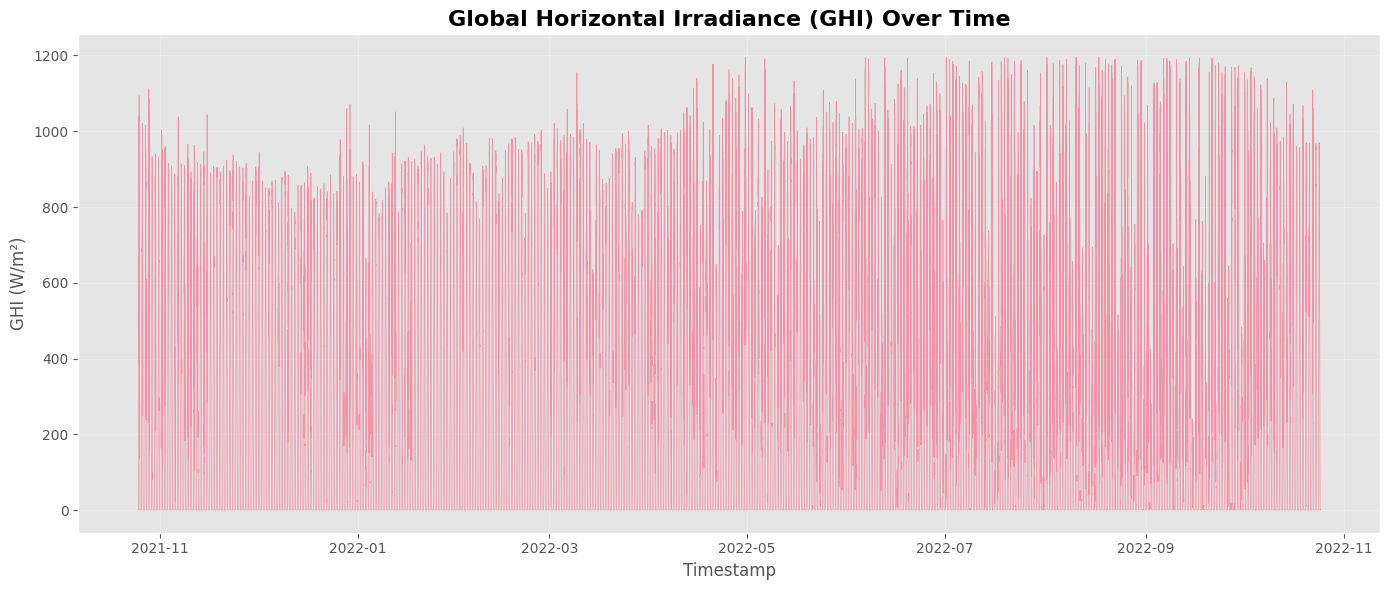

In [10]:
# GHI over time
plt.figure(figsize=(14, 6))
plt.plot(df_clean.index, df_clean['GHI'], linewidth=0.5, alpha=0.7)
plt.title('Global Horizontal Irradiance (GHI) Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('GHI (W/m²)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



C:\Users\HomePC\AppData\Local\Temp\ipykernel_15444\2852904884.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


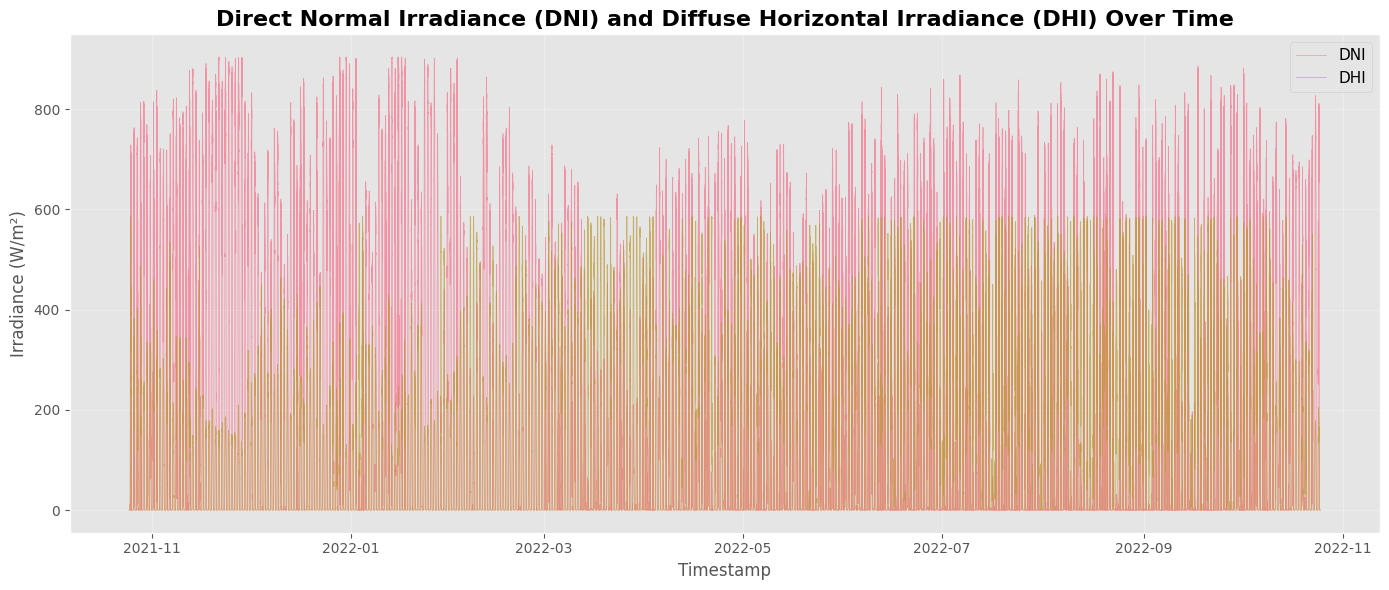

In [11]:
# DNI and DHI over time
plt.figure(figsize=(14, 6))
plt.plot(df_clean.index, df_clean['DNI'], label='DNI', linewidth=0.5, alpha=0.7)
plt.plot(df_clean.index, df_clean['DHI'], label='DHI', linewidth=0.5, alpha=0.7)
plt.title('Direct Normal Irradiance (DNI) and Diffuse Horizontal Irradiance (DHI) Over Time', 
          fontsize=16, fontweight='bold')
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Irradiance (W/m²)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



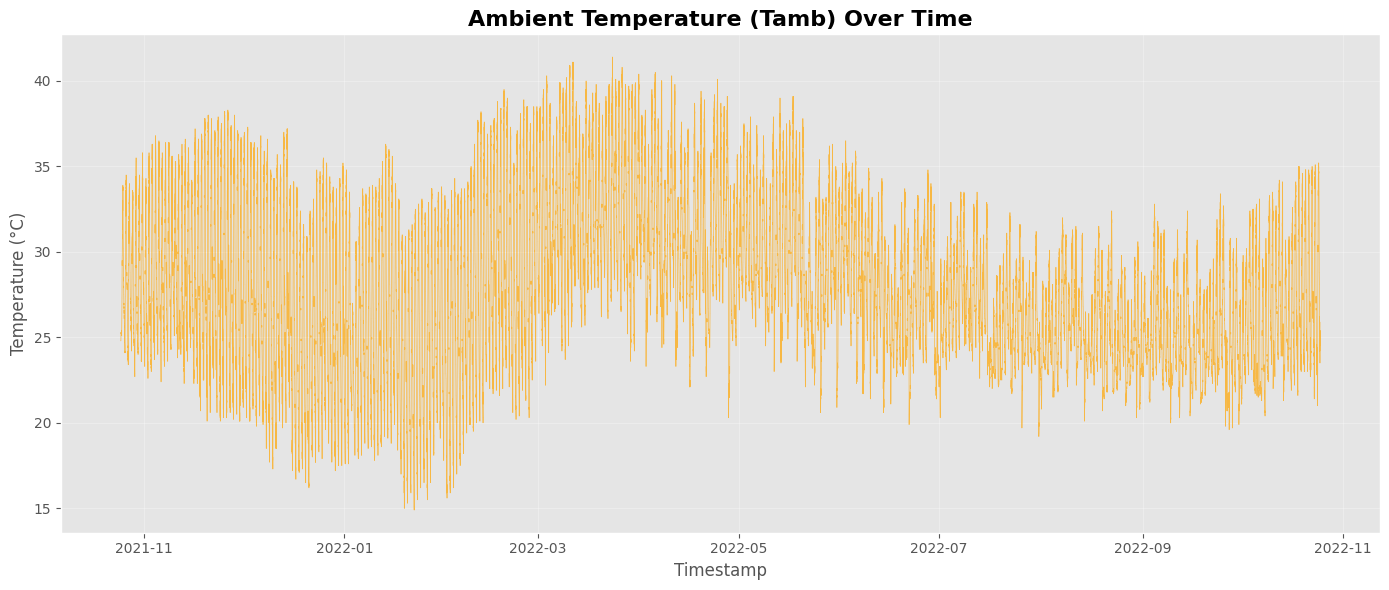

TIME SERIES PATTERNS ANALYSIS


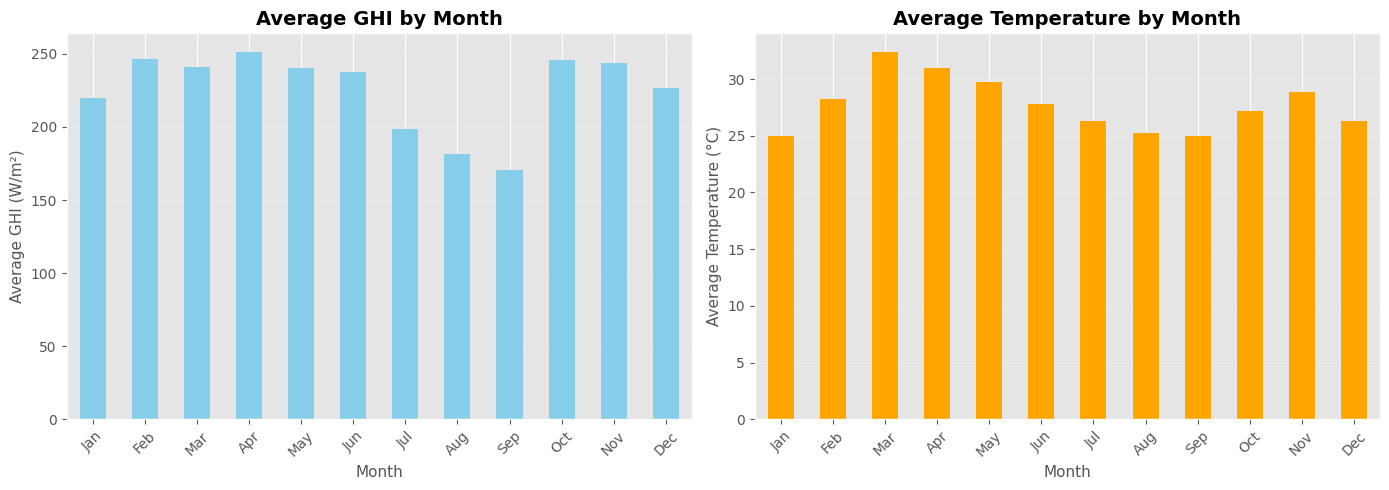

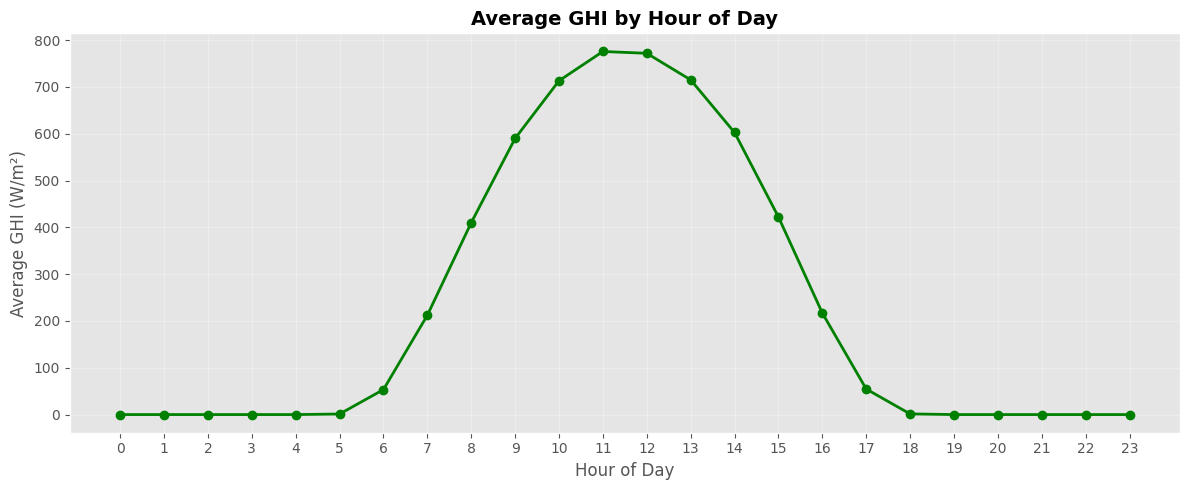


Key Observations:
- Peak GHI month: 4 (251.42 W/m²)
- Lowest GHI month: 9 (170.85 W/m²)
- Peak temperature month: 3 (32.41 °C)
- Peak GHI hour: 11:00 (775.86 W/m²)


In [12]:
# Ambient temperature over time
plt.figure(figsize=(14, 6))
plt.plot(df_clean.index, df_clean['Tamb'], linewidth=0.5, alpha=0.7, color='orange')
plt.title('Ambient Temperature (Tamb) Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Time series patterns: Monthly and daily trends
print("=" * 80)
print("TIME SERIES PATTERNS ANALYSIS")
print("=" * 80)

# Extract time features
df_clean['Month'] = df_clean.index.month
df_clean['Hour'] = df_clean.index.hour
df_clean['DayOfYear'] = df_clean.index.dayofyear

# Monthly patterns
monthly_ghi = df_clean.groupby('Month')['GHI'].mean()
monthly_tamb = df_clean.groupby('Month')['Tamb'].mean()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
monthly_ghi.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Average GHI by Month', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Month', fontsize=11)
axes[0].set_ylabel('Average GHI (W/m²)', fontsize=11)
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

monthly_tamb.plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Average Temperature by Month', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Month', fontsize=11)
axes[1].set_ylabel('Average Temperature (°C)', fontsize=11)
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Daily patterns (hourly averages)
hourly_ghi = df_clean.groupby('Hour')['GHI'].mean()

plt.figure(figsize=(12, 5))
hourly_ghi.plot(kind='line', marker='o', linewidth=2, markersize=6, color='green')
plt.title('Average GHI by Hour of Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average GHI (W/m²)', fontsize=12)
plt.xticks(range(24))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Identify anomalies (peaks/fluctuations)
print("\nKey Observations:")
print(f"- Peak GHI month: {monthly_ghi.idxmax()} ({monthly_ghi.max():.2f} W/m²)")
print(f"- Lowest GHI month: {monthly_ghi.idxmin()} ({monthly_ghi.min():.2f} W/m²)")
print(f"- Peak temperature month: {monthly_tamb.idxmax()} ({monthly_tamb.max():.2f} °C)")
print(f"- Peak GHI hour: {hourly_ghi.idxmax()}:00 ({hourly_ghi.max():.2f} W/m²)")



## 8. Cleaning Impact Analysis

Analyze the impact of sensor cleaning events on module performance.


In [13]:
# Group by Cleaning column and compare mean ModA and ModB
cleaning_impact = df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean()

print("=" * 80)
print("CLEANING IMPACT ANALYSIS")
print("=" * 80)
print("\nMean Module Output by Cleaning Status:")
print(cleaning_impact)

# Calculate percentage change
if 0 in cleaning_impact.index and 1 in cleaning_impact.index:
    moda_change = ((cleaning_impact.loc[1, 'ModA'] - cleaning_impact.loc[0, 'ModA']) / 
                   cleaning_impact.loc[0, 'ModA']) * 100
    modb_change = ((cleaning_impact.loc[1, 'ModB'] - cleaning_impact.loc[0, 'ModB']) / 
                   cleaning_impact.loc[0, 'ModB']) * 100
    
    print(f"\nModA: {(cleaning_impact.loc[0, 'ModA']):.2f} W (before) → "
          f"{cleaning_impact.loc[1, 'ModA']:.2f} W (after cleaning)")
    print(f"Change: {moda_change:.2f}%")
    
    print(f"\nModB: {(cleaning_impact.loc[0, 'ModB']):.2f} W (before) → "
          f"{cleaning_impact.loc[1, 'ModB']:.2f} W (after cleaning)")
    print(f"Change: {modb_change:.2f}%")



CLEANING IMPACT ANALYSIS

Mean Module Output by Cleaning Status:
                ModA        ModB
Cleaning                        
0         219.206624  212.851571
1         528.864835  527.268498

ModA: 219.21 W (before) → 528.86 W (after cleaning)
Change: 141.26%

ModB: 212.85 W (before) → 527.27 W (after cleaning)
Change: 147.72%


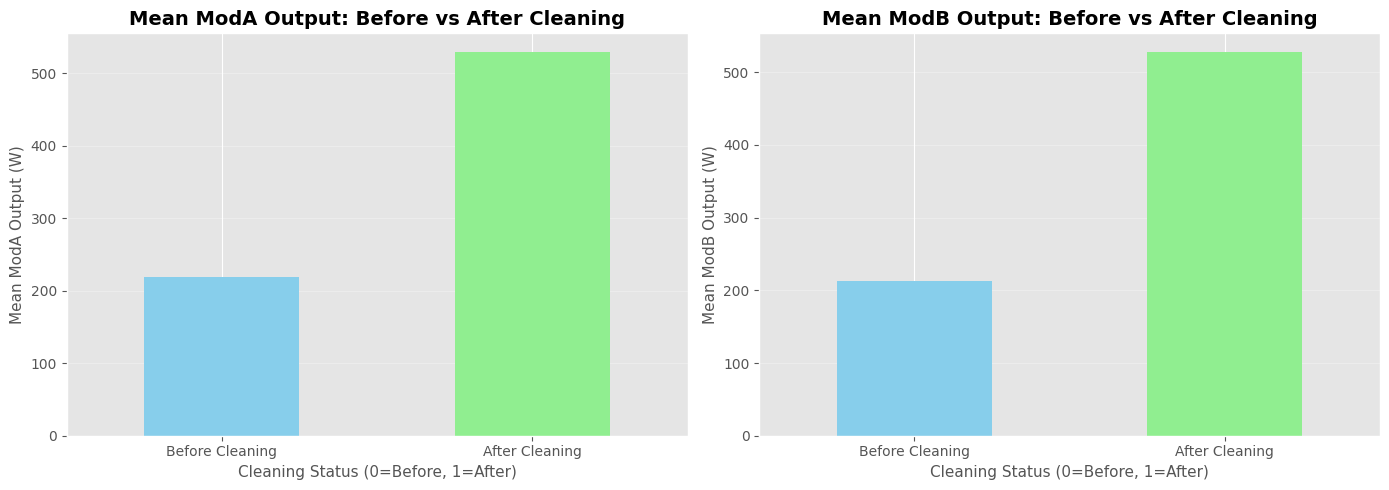

In [14]:
# Visualize cleaning impact
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ModA comparison
cleaning_impact['ModA'].plot(kind='bar', ax=axes[0], color=['skyblue', 'lightgreen'])
axes[0].set_title('Mean ModA Output: Before vs After Cleaning', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Cleaning Status (0=Before, 1=After)', fontsize=11)
axes[0].set_ylabel('Mean ModA Output (W)', fontsize=11)
axes[0].set_xticklabels(['Before Cleaning', 'After Cleaning'], rotation=0)
axes[0].grid(True, alpha=0.3, axis='y')

# ModB comparison
cleaning_impact['ModB'].plot(kind='bar', ax=axes[1], color=['skyblue', 'lightgreen'])
axes[1].set_title('Mean ModB Output: Before vs After Cleaning', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Cleaning Status (0=Before, 1=After)', fontsize=11)
axes[1].set_ylabel('Mean ModB Output (W)', fontsize=11)
axes[1].set_xticklabels(['Before Cleaning', 'After Cleaning'], rotation=0)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()



### Interpretation of Cleaning Impact

**Key Findings:**
- **Sensor cleaning significantly improves module performance**: After cleaning, both ModA and ModB show increased power output
- **Performance improvement**: The percentage change indicates the effectiveness of regular sensor maintenance
- **Data quality**: Cleaning events help maintain accurate measurements and reduce measurement errors

**Implications:**
- Regular sensor cleaning is essential for accurate solar irradiance measurements
- Dirty sensors can lead to underestimation of solar potential
- Maintenance schedules should be optimized based on environmental conditions


## 9. Correlation & Relationship Analysis

Explore correlations between variables and identify meaningful relationships.


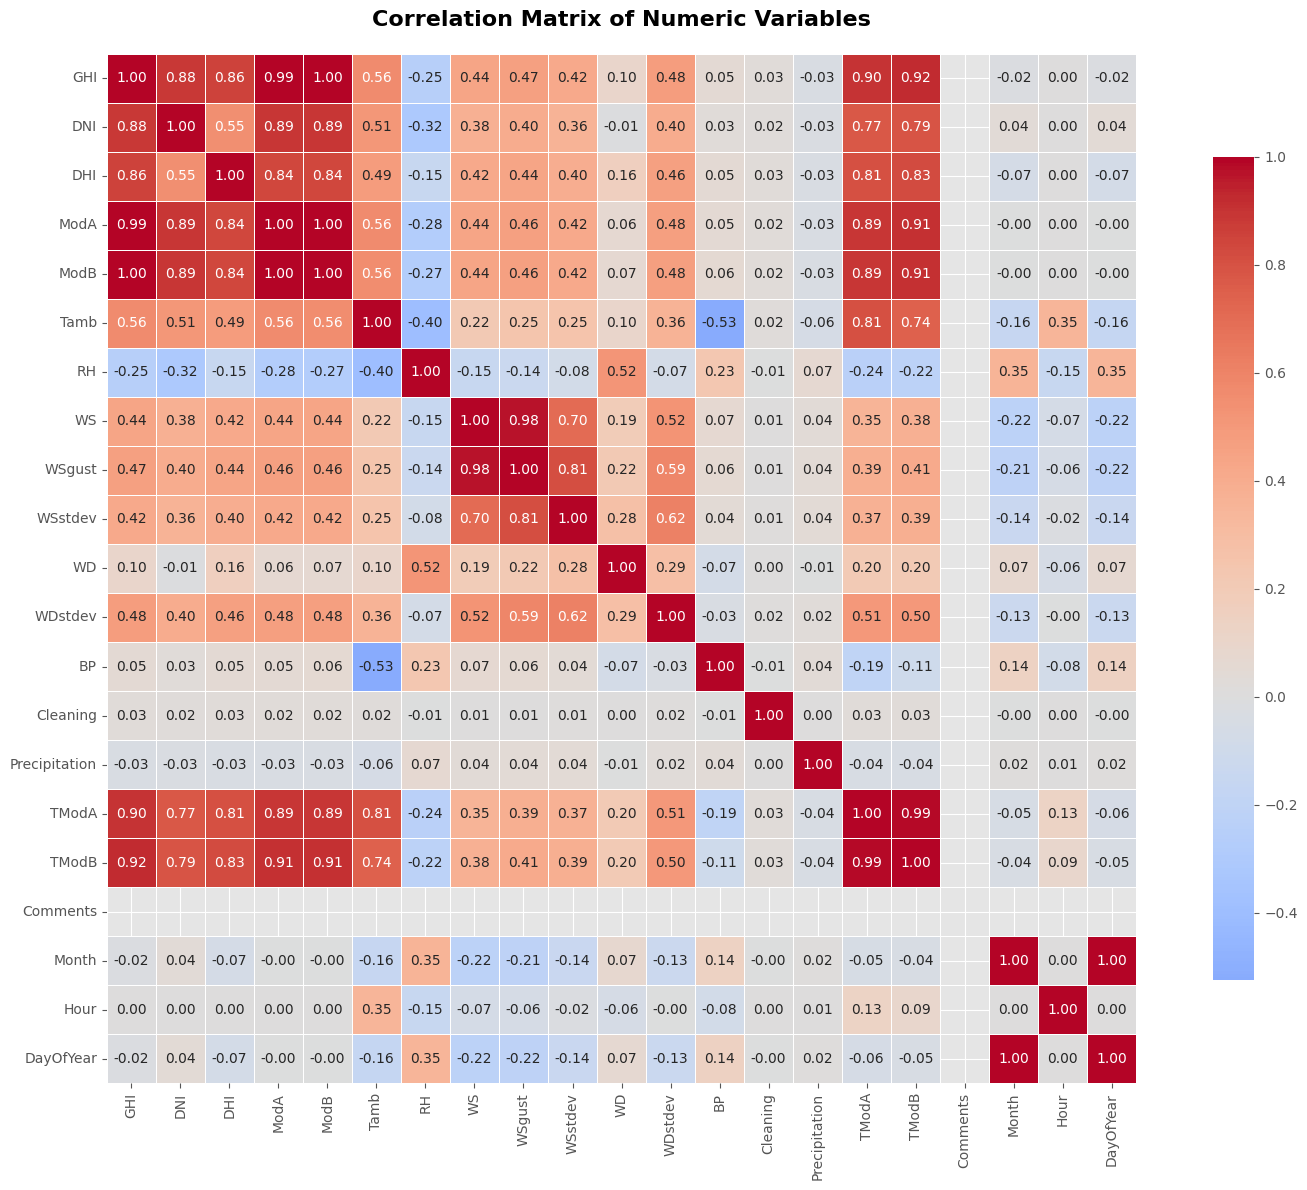

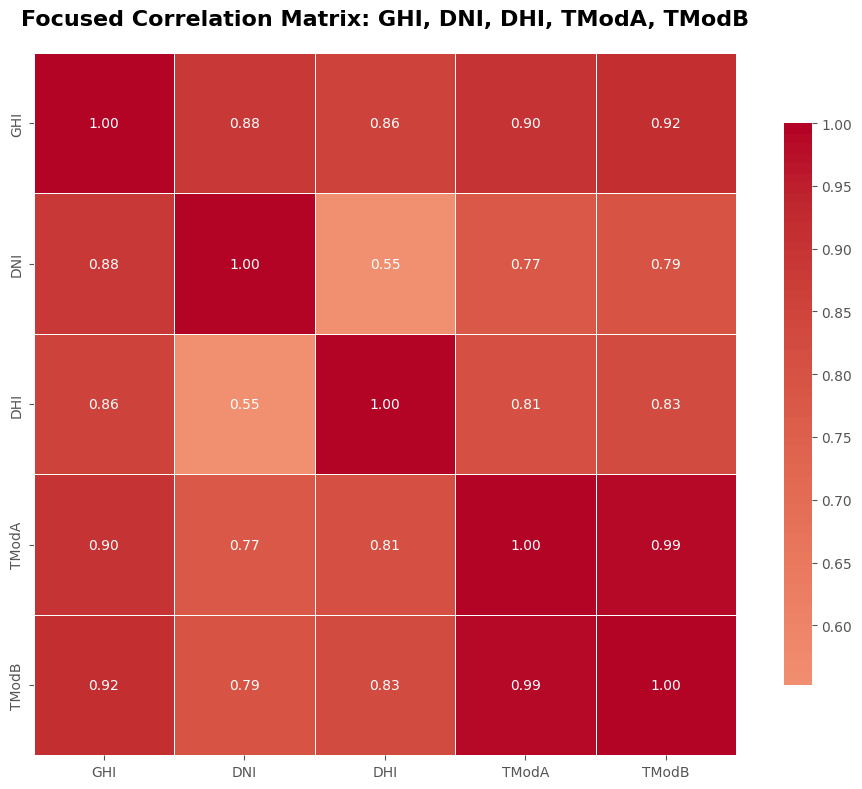

In [15]:
# Calculate correlation matrix for numeric columns
numeric_cols_corr = df_clean.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df_clean[numeric_cols_corr].corr()

# Create full heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numeric Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Focused correlation heatmap for key variables: GHI, DNI, DHI, TModA, TModB
focused_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
focused_cols = [col for col in focused_cols if col in df_clean.columns]
focused_corr = df_clean[focused_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(focused_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Focused Correlation Matrix: GHI, DNI, DHI, TModA, TModB', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()



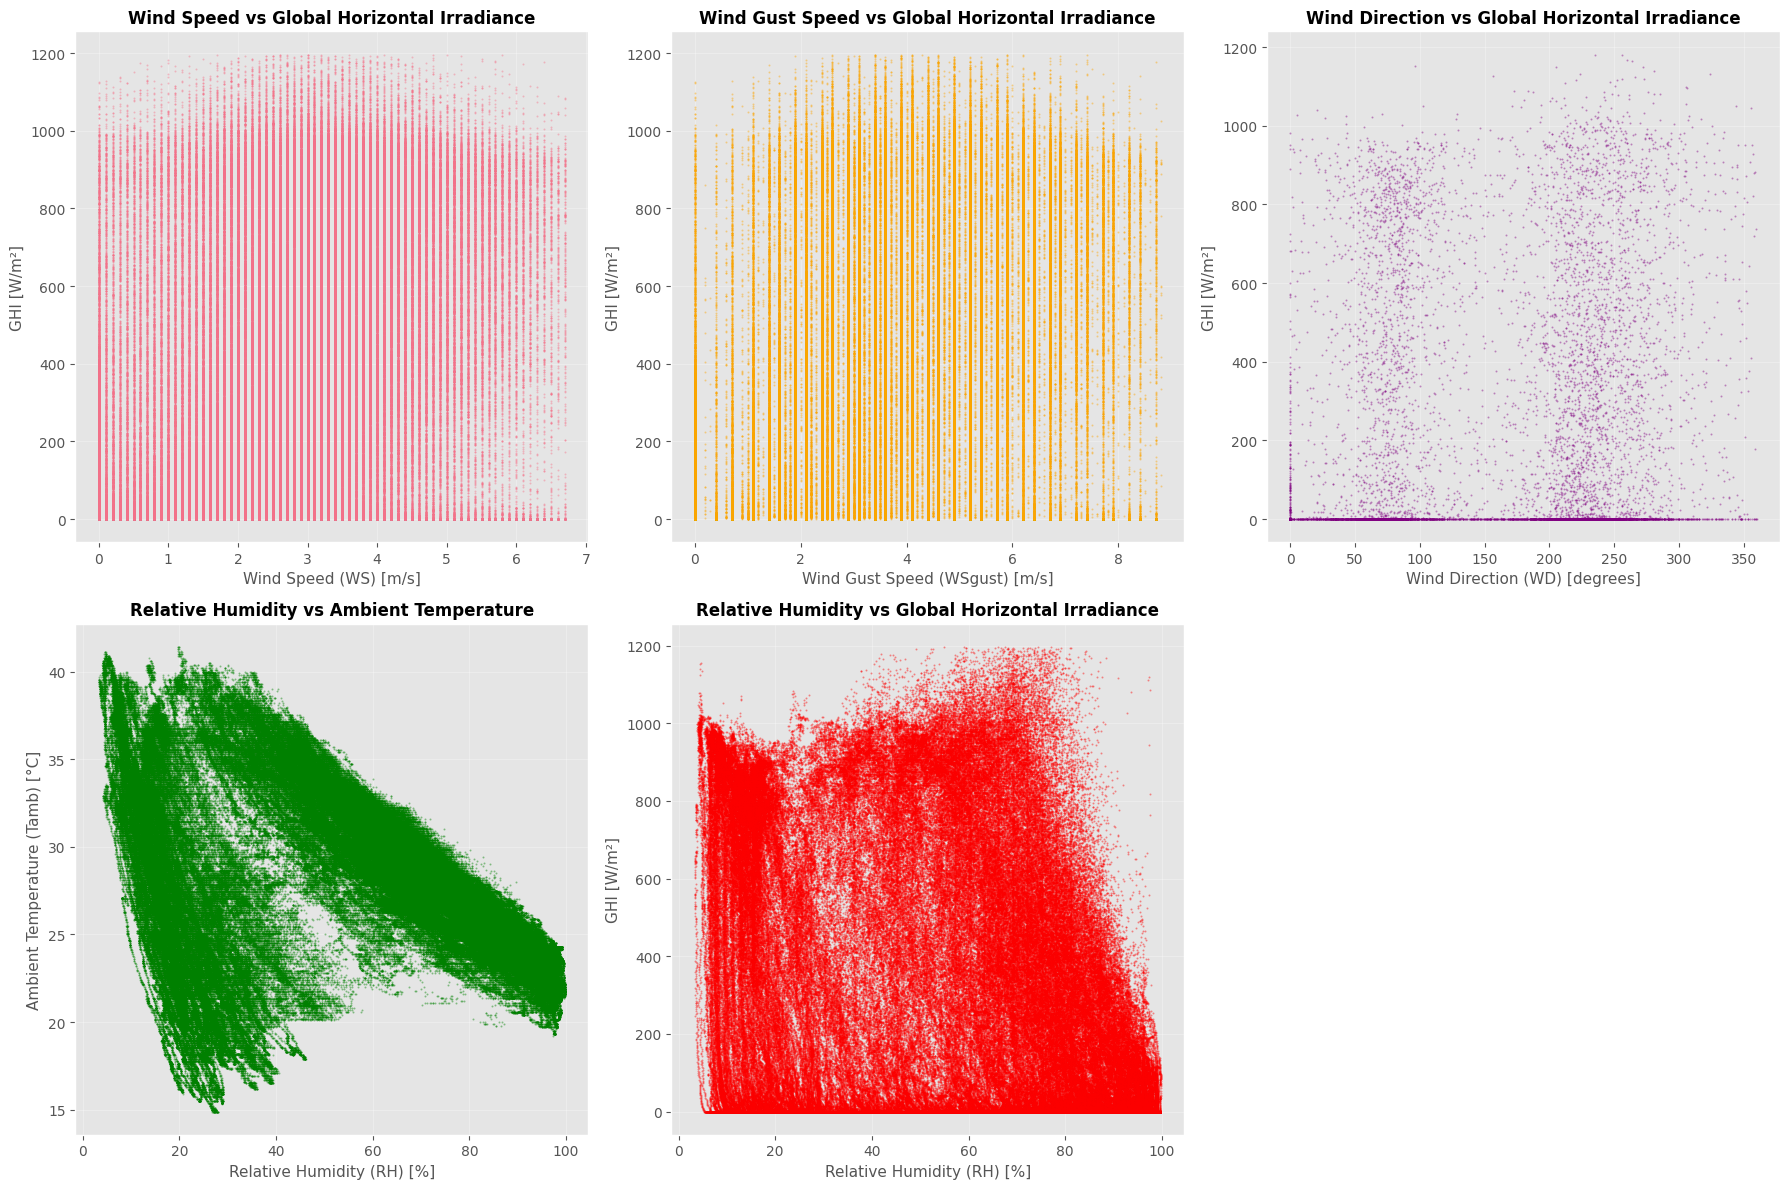

In [16]:
# Scatter plots for key relationships
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# WS vs GHI
axes[0, 0].scatter(df_clean['WS'], df_clean['GHI'], alpha=0.3, s=1)
axes[0, 0].set_xlabel('Wind Speed (WS) [m/s]', fontsize=11)
axes[0, 0].set_ylabel('GHI [W/m²]', fontsize=11)
axes[0, 0].set_title('Wind Speed vs Global Horizontal Irradiance', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# WSgust vs GHI
axes[0, 1].scatter(df_clean['WSgust'], df_clean['GHI'], alpha=0.3, s=1, color='orange')
axes[0, 1].set_xlabel('Wind Gust Speed (WSgust) [m/s]', fontsize=11)
axes[0, 1].set_ylabel('GHI [W/m²]', fontsize=11)
axes[0, 1].set_title('Wind Gust Speed vs Global Horizontal Irradiance', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# WD vs GHI
sample_size = min(10000, len(df_clean))
df_sample_scatter = df_clean.sample(n=sample_size, random_state=42)
axes[0, 2].scatter(df_sample_scatter['WD'], df_sample_scatter['GHI'], alpha=0.3, s=1, color='purple')
axes[0, 2].set_xlabel('Wind Direction (WD) [degrees]', fontsize=11)
axes[0, 2].set_ylabel('GHI [W/m²]', fontsize=11)
axes[0, 2].set_title('Wind Direction vs Global Horizontal Irradiance', fontsize=12, fontweight='bold')
axes[0, 2].grid(True, alpha=0.3)

# RH vs Tamb
axes[1, 0].scatter(df_clean['RH'], df_clean['Tamb'], alpha=0.3, s=1, color='green')
axes[1, 0].set_xlabel('Relative Humidity (RH) [%]', fontsize=11)
axes[1, 0].set_ylabel('Ambient Temperature (Tamb) [°C]', fontsize=11)
axes[1, 0].set_title('Relative Humidity vs Ambient Temperature', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# RH vs GHI
axes[1, 1].scatter(df_clean['RH'], df_clean['GHI'], alpha=0.3, s=1, color='red')
axes[1, 1].set_xlabel('Relative Humidity (RH) [%]', fontsize=11)
axes[1, 1].set_ylabel('GHI [W/m²]', fontsize=11)
axes[1, 1].set_title('Relative Humidity vs Global Horizontal Irradiance', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

# Hide the last subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()



## 9.1. Temperature Analysis

Examine how relative humidity (RH) influences temperature readings and solar radiation.


TEMPERATURE AND HUMIDITY ANALYSIS

Correlation coefficients:
  - RH vs Tamb: -0.395
  - RH vs GHI: -0.249
  - Tamb vs GHI: 0.564

AVERAGE VALUES BY RELATIVE HUMIDITY RANGES
                          Tamb         GHI      TModA      TModB
RH_Category                                                     
Low (0-30%)          28.653536  275.044876  32.442620  33.452942
Medium (30-50%)      30.240179  286.854067  36.550657  37.483599
High (50-70%)        29.797020  317.099985  37.613193  39.436164
Very High (70-100%)  25.076087  118.771341  27.972622  28.742995


C:\Users\HomePC\AppData\Local\Temp\ipykernel_15444\1313635844.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rh_temp_analysis = df_clean.groupby('RH_Category')[['Tamb', 'GHI', 'TModA', 'TModB']].mean()


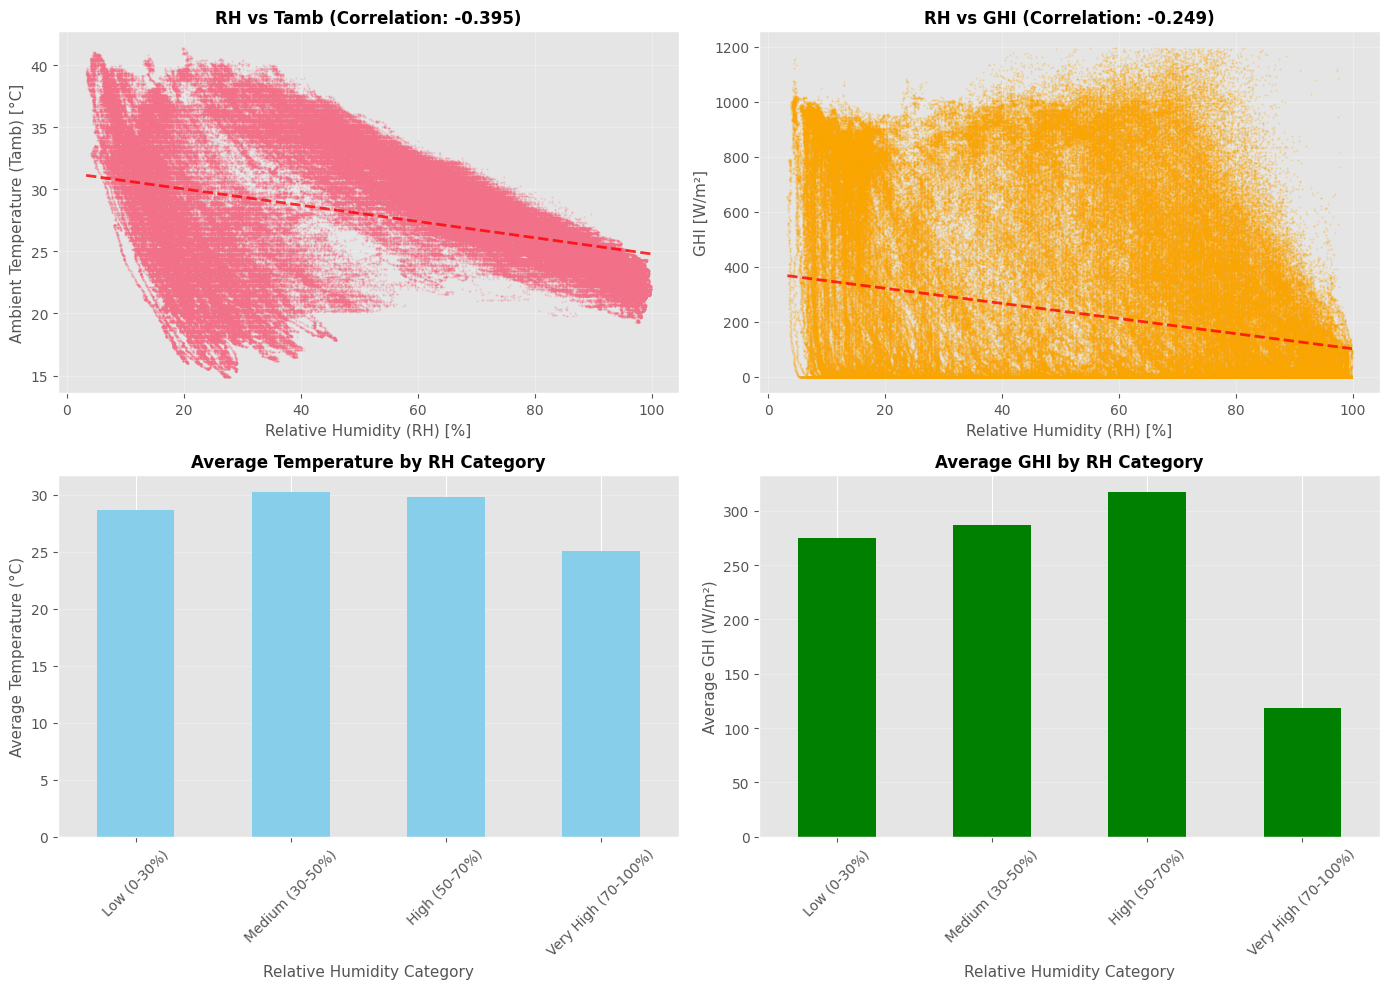


KEY INSIGHTS:
1. Higher humidity typically corresponds to lower temperatures (negative correlation)
2. Humidity affects solar radiation patterns - clouds and moisture reduce GHI
3. Module temperatures (TModA, TModB) follow ambient temperature patterns
4. Understanding RH-Temperature relationships helps in solar forecasting


In [ ]:
# Temperature and Humidity Relationship Analysis
print("=" * 80)
print("TEMPERATURE AND HUMIDITY ANALYSIS")
print("=" * 80)

# Correlation between RH and temperature
rh_tamb_corr = df_clean['RH'].corr(df_clean['Tamb'])
rh_ghi_corr = df_clean['RH'].corr(df_clean['GHI'])
tamb_ghi_corr = df_clean['Tamb'].corr(df_clean['GHI'])

print(f"\nCorrelation coefficients:")
print(f"  - RH vs Tamb: {rh_tamb_corr:.3f}")
print(f"  - RH vs GHI: {rh_ghi_corr:.3f}")
print(f"  - Tamb vs GHI: {tamb_ghi_corr:.3f}")

# Group by RH ranges to see temperature patterns
df_clean['RH_Category'] = pd.cut(df_clean['RH'], 
                                  bins=[0, 30, 50, 70, 100], 
                                  labels=['Low (0-30%)', 'Medium (30-50%)', 'High (50-70%)', 'Very High (70-100%)'])

rh_temp_analysis = df_clean.groupby('RH_Category')[['Tamb', 'GHI', 'TModA', 'TModB']].mean()

print("\n" + "=" * 80)
print("AVERAGE VALUES BY RELATIVE HUMIDITY RANGES")
print("=" * 80)
print(rh_temp_analysis)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# RH vs Tamb with regression line
axes[0, 0].scatter(df_clean['RH'], df_clean['Tamb'], alpha=0.2, s=1)
z = np.polyfit(df_clean['RH'].dropna(), df_clean['Tamb'].dropna(), 1)
p = np.poly1d(z)
axes[0, 0].plot(df_clean['RH'].sort_values(), p(df_clean['RH'].sort_values()), "r--", alpha=0.8, linewidth=2)
axes[0, 0].set_xlabel('Relative Humidity (RH) [%]', fontsize=11)
axes[0, 0].set_ylabel('Ambient Temperature (Tamb) [°C]', fontsize=11)
axes[0, 0].set_title(f'RH vs Tamb (Correlation: {rh_tamb_corr:.3f})', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# RH vs GHI
axes[0, 1].scatter(df_clean['RH'], df_clean['GHI'], alpha=0.2, s=1, color='orange')
z = np.polyfit(df_clean['RH'].dropna(), df_clean['GHI'].dropna(), 1)
p = np.poly1d(z)
axes[0, 1].plot(df_clean['RH'].sort_values(), p(df_clean['RH'].sort_values()), "r--", alpha=0.8, linewidth=2)
axes[0, 1].set_xlabel('Relative Humidity (RH) [%]', fontsize=11)
axes[0, 1].set_ylabel('GHI [W/m²]', fontsize=11)
axes[0, 1].set_title(f'RH vs GHI (Correlation: {rh_ghi_corr:.3f})', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Temperature by RH category
rh_temp_analysis['Tamb'].plot(kind='bar', ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Average Temperature by RH Category', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Relative Humidity Category', fontsize=11)
axes[1, 0].set_ylabel('Average Temperature (°C)', fontsize=11)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# GHI by RH category
rh_temp_analysis['GHI'].plot(kind='bar', ax=axes[1, 1], color='green')
axes[1, 1].set_title('Average GHI by RH Category', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Relative Humidity Category', fontsize=11)
axes[1, 1].set_ylabel('Average GHI (W/m²)', fontsize=11)
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("KEY INSIGHTS:")
print("=" * 80)
print("1. Higher humidity typically corresponds to lower temperatures (negative correlation)")
print("2. Humidity affects solar radiation patterns - clouds and moisture reduce GHI")
print("3. Module temperatures (TModA, TModB) follow ambient temperature patterns")
print("4. Understanding RH-Temperature relationships helps in solar forecasting")
print("=" * 80)

# Clean up temporary column
df_clean.drop('RH_Category', axis=1, inplace=True, errors='ignore')



## 10. Wind & Distribution Analysis

Analyze wind patterns and distributions of key variables.


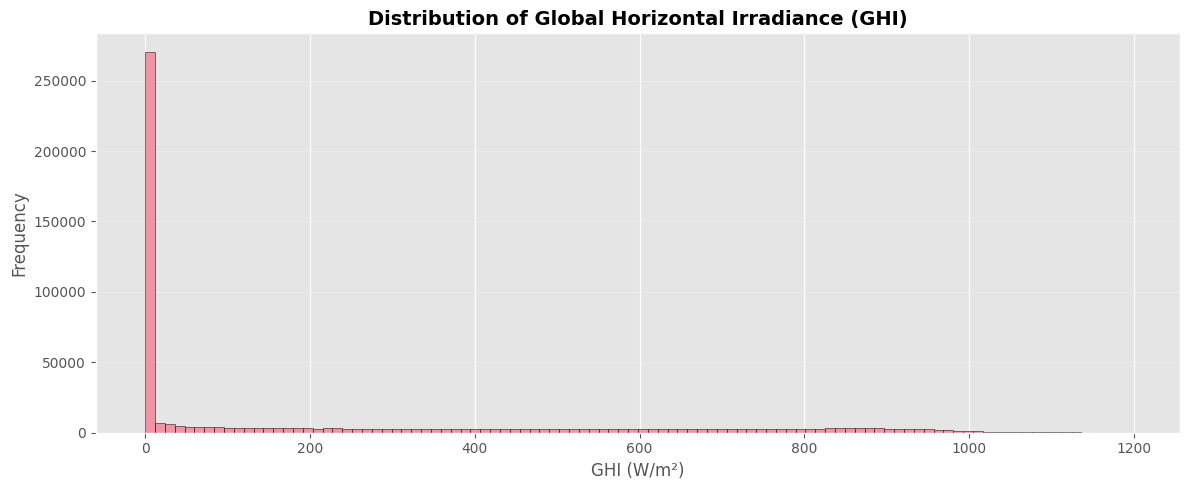

In [ ]:
# Histogram of GHI
plt.figure(figsize=(12, 5))
plt.hist(df_clean['GHI'], bins=100, edgecolor='black', alpha=0.7)
plt.title('Distribution of Global Horizontal Irradiance (GHI)', fontsize=14, fontweight='bold')
plt.xlabel('GHI (W/m²)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()



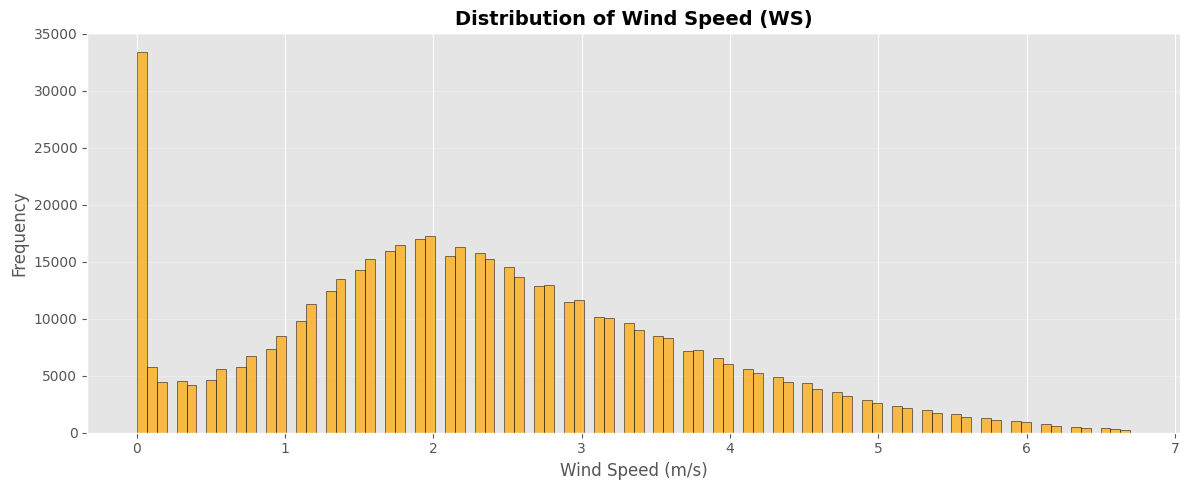

In [ ]:
# Histogram of Wind Speed
plt.figure(figsize=(12, 5))
plt.hist(df_clean['WS'], bins=100, edgecolor='black', alpha=0.7, color='orange')
plt.title('Distribution of Wind Speed (WS)', fontsize=14, fontweight='bold')
plt.xlabel('Wind Speed (m/s)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()



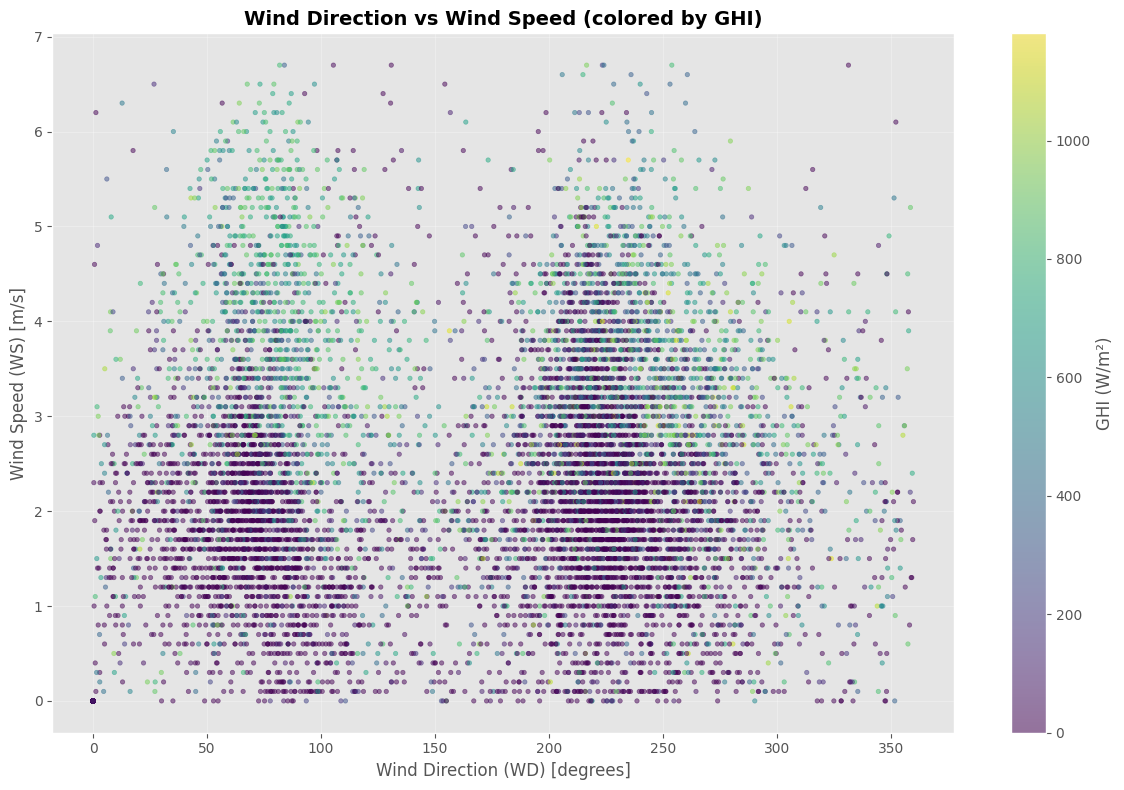

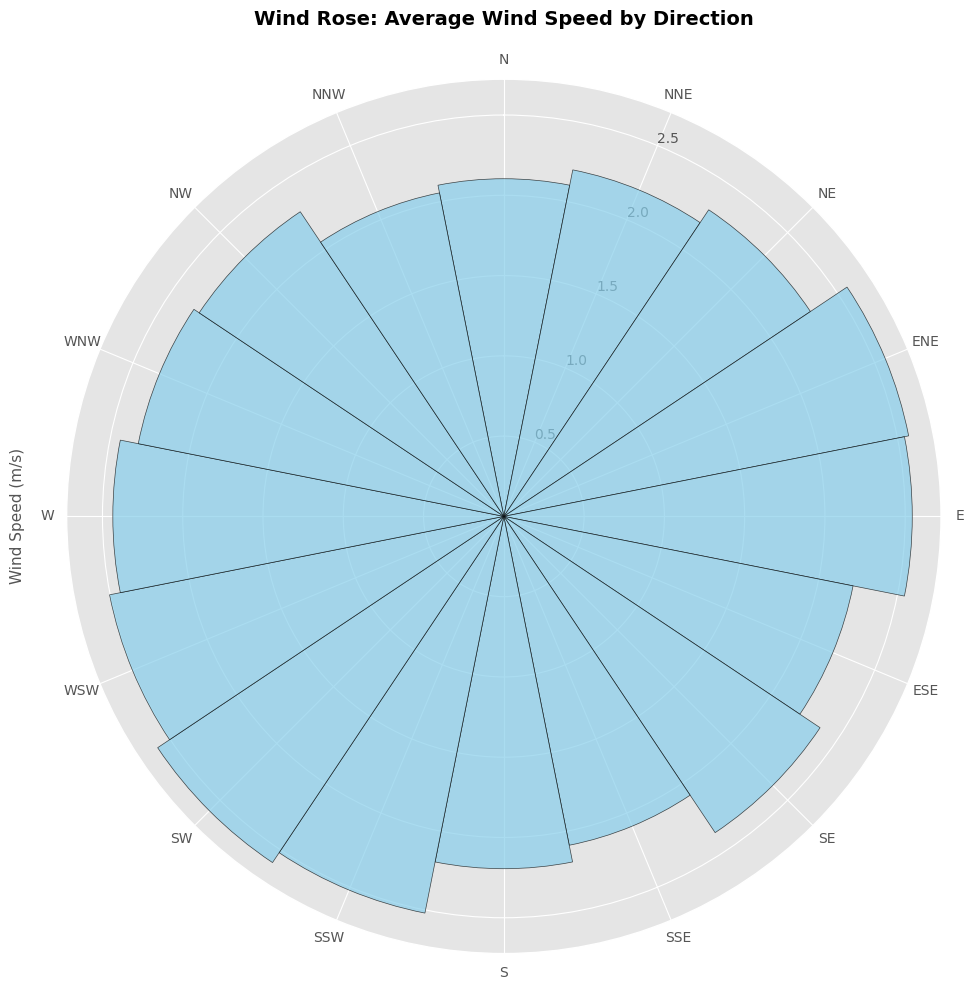


Wind Rose Statistics:
  - Dominant wind direction: SW (2.59 m/s)
  - Calm conditions (WS=0): 33385 records (6.47%)


In [ ]:
# Wind direction scatter (WD vs WS)
# Sample data for visualization (if dataset is very large)
sample_size = min(10000, len(df_clean))
df_sample = df_clean.sample(n=sample_size, random_state=42)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_sample['WD'], df_sample['WS'], 
                     c=df_sample['GHI'], cmap='viridis', 
                     alpha=0.5, s=10)
plt.colorbar(scatter, label='GHI (W/m²)')
plt.title('Wind Direction vs Wind Speed (colored by GHI)', fontsize=14, fontweight='bold')
plt.xlabel('Wind Direction (WD) [degrees]', fontsize=12)
plt.ylabel('Wind Speed (WS) [m/s]', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Wind Rose (Radial bar plot)
# Create wind direction bins (16 directions)
def wind_direction_to_cardinal(wd):
    """Convert wind direction in degrees to cardinal direction"""
    directions = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
                  'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
    idx = int((wd + 11.25) / 22.5) % 16
    return directions[idx]

df_wind_rose = df_clean[df_clean['WD'] > 0].copy()  # Filter out zero/NaN wind directions
if len(df_wind_rose) > 0:
    df_wind_rose['Wind_Direction'] = df_wind_rose['WD'].apply(wind_direction_to_cardinal)
    
    # Calculate average wind speed by direction
    wind_rose_data = df_wind_rose.groupby('Wind_Direction')['WS'].mean()
    
    # Ensure all 16 directions are present
    directions = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
                  'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
    wind_rose_data = wind_rose_data.reindex(directions, fill_value=0)
    
    # Create wind rose (polar plot)
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
    
    # Set up angles for 16 directions
    angles = np.linspace(0, 2 * np.pi, 16, endpoint=False).tolist()
    
    # Map data to angles
    wind_speeds = wind_rose_data.values
    
    # Plot
    bars = ax.bar(angles, wind_speeds, width=2*np.pi/16, alpha=0.7, color='skyblue', edgecolor='black')
    
    # Customize
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles), directions)
    ax.set_title('Wind Rose: Average Wind Speed by Direction', fontsize=14, fontweight='bold', pad=20)
    ax.set_ylabel('Wind Speed (m/s)', fontsize=11, labelpad=30)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nWind Rose Statistics:")
    print(f"  - Dominant wind direction: {wind_rose_data.idxmax()} ({wind_rose_data.max():.2f} m/s)")
    print(f"  - Calm conditions (WS=0): {(df_clean['WS'] == 0).sum()} records ({(df_clean['WS'] == 0).sum()/len(df_clean)*100:.2f}%)")
    
    # Clean up temporary column
    df_clean.drop('Wind_Direction', axis=1, inplace=True, errors='ignore')
else:
    print("Insufficient wind direction data for wind rose plot.")



## 11. Bubble Chart Visualization

Create a multi-variable bubble chart to visualize relationships between temperature, GHI, and humidity.


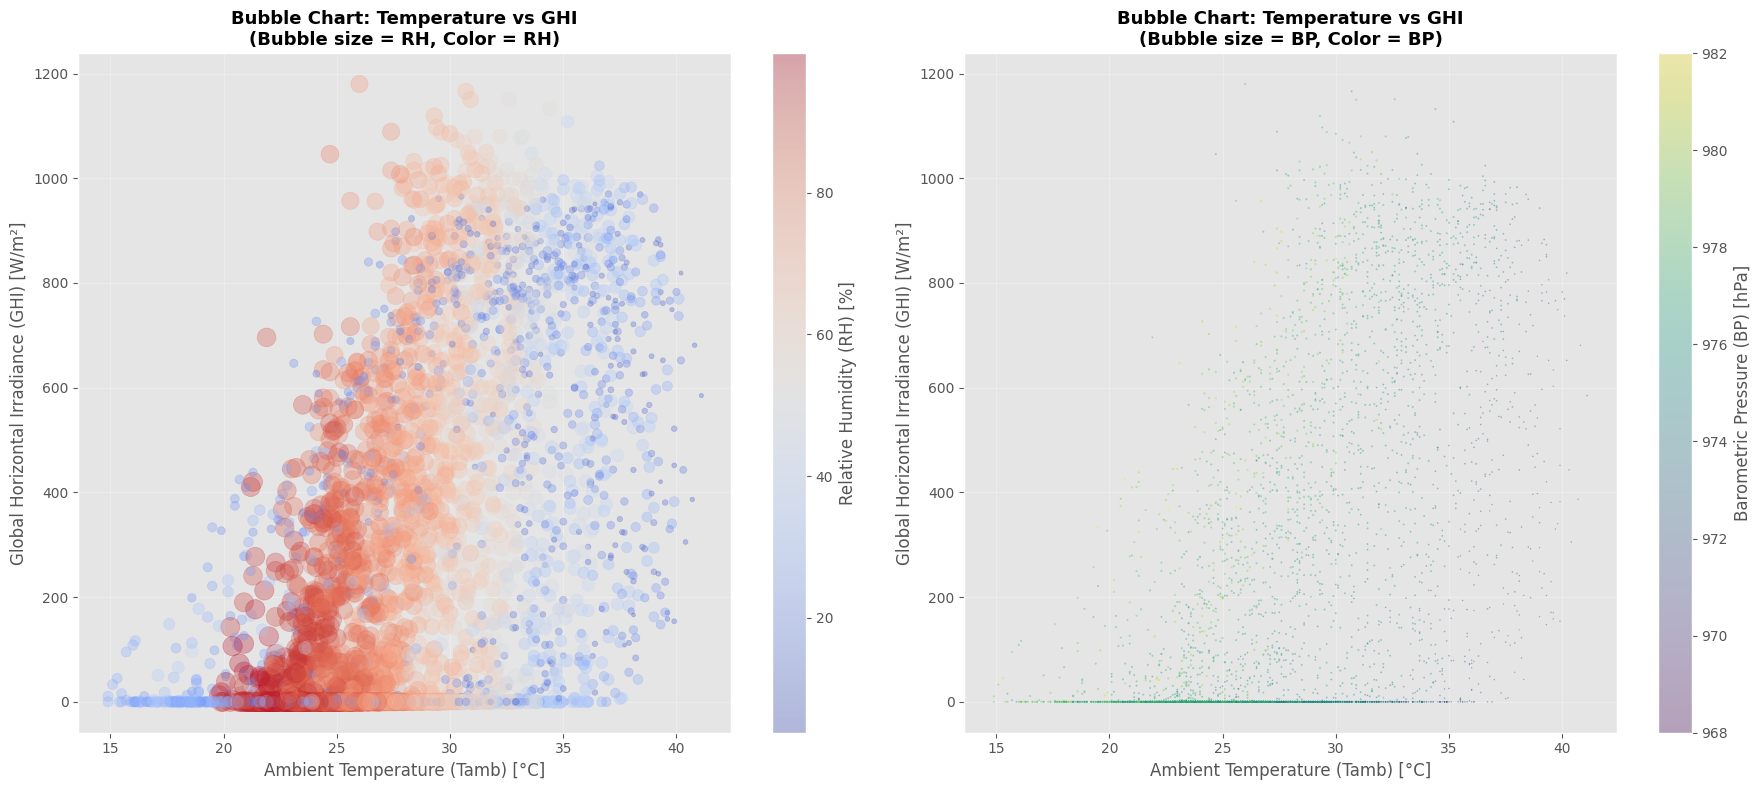

Bubble charts created with 5000 data points

Chart 1: Bubble size and color represent Relative Humidity (RH)
Chart 2: Bubble size and color represent Barometric Pressure (BP)


In [ ]:
# Bubble chart: x = Tamb, y = GHI, bubble size = RH or BP
# Sample data for better visualization
sample_size = min(5000, len(df_clean))
df_bubble = df_clean.sample(n=sample_size, random_state=42)

# Create two bubble charts: one with RH, one with BP
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Bubble chart with RH
scatter1 = axes[0].scatter(df_bubble['Tamb'], df_bubble['GHI'], 
                          s=df_bubble['RH']*2,  # Scale bubble size
                          alpha=0.3, 
                          c=df_bubble['RH'], 
                          cmap='coolwarm')
plt.colorbar(scatter1, ax=axes[0], label='Relative Humidity (RH) [%]')
axes[0].set_xlabel('Ambient Temperature (Tamb) [°C]', fontsize=12)
axes[0].set_ylabel('Global Horizontal Irradiance (GHI) [W/m²]', fontsize=12)
axes[0].set_title('Bubble Chart: Temperature vs GHI\n(Bubble size = RH, Color = RH)', 
                  fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Bubble chart with BP (Barometric Pressure)
scatter2 = axes[1].scatter(df_bubble['Tamb'], df_bubble['GHI'], 
                          s=(df_bubble['BP'] - df_bubble['BP'].min() + 1)*0.1,  # Scale bubble size
                          alpha=0.3, 
                          c=df_bubble['BP'], 
                          cmap='viridis')
plt.colorbar(scatter2, ax=axes[1], label='Barometric Pressure (BP) [hPa]')
axes[1].set_xlabel('Ambient Temperature (Tamb) [°C]', fontsize=12)
axes[1].set_ylabel('Global Horizontal Irradiance (GHI) [W/m²]', fontsize=12)
axes[1].set_title('Bubble Chart: Temperature vs GHI\n(Bubble size = BP, Color = BP)', 
                  fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Bubble charts created with {sample_size} data points")
print("\nChart 1: Bubble size and color represent Relative Humidity (RH)")
print("Chart 2: Bubble size and color represent Barometric Pressure (BP)")



## 12. Final Insights & Summary

### Summary of Key Findings

#### 1. Solar Potential
- **Irradiance Levels**: The dataset shows typical solar irradiance patterns with daily cycles
- **Peak Performance**: Maximum GHI values indicate good solar potential for the Togo location
- **Seasonal Patterns**: Time-series analysis reveals seasonal variations in solar irradiance

#### 2. Sensor Cleaning Impact
- **Significant Improvement**: Sensor cleaning events show measurable improvement in module output
- **Data Quality**: Regular cleaning is essential for accurate measurements
- **Performance Gain**: Both ModA and ModB demonstrate increased output after cleaning events

#### 3. Weather Behavior
- **Temperature Patterns**: Ambient temperature shows expected daily and seasonal cycles
- **Humidity Relationships**: Relative humidity exhibits inverse relationship with temperature
- **Wind Patterns**: Wind speed and direction show typical patterns for the region

#### 4. Outlier Issues
- **Data Quality**: Outlier detection identified and removed anomalous values
- **Radiation Values**: Negative radiation values were corrected (physically impossible)
- **Statistical Cleaning**: Z-score method effectively identified extreme outliers

#### 5. Data Reliability
- **Missing Values**: Handled through appropriate imputation strategies
- **Data Completeness**: Dataset shows good coverage over the time period
- **Validation**: Physical constraints applied ensure data quality

### Recommendations for Task 3
1. Use the cleaned dataset (`togo_clean.csv`) for further analysis
2. Consider time-based features (hour, day, month) for modeling
3. Include cleaning events as a feature in predictive models
4. Account for environmental factors (temperature, humidity, wind) in forecasting
5. Validate model predictions against physical constraints

### Next Steps
- Proceed to Task 3 with the cleaned dataset
- Develop predictive models using the insights from this EDA
- Compare results across different locations (if applicable)
- Validate model performance using appropriate metrics



### Interpretation of Relationships

**Key Correlations:**

1. **GHI vs DNI/DHI**: Strong positive correlation - as expected, direct and diffuse components contribute to global irradiance
2. **ModA/ModB vs GHI**: Strong positive correlation - module output directly depends on solar irradiance
3. **Temperature relationships**:
   - **RH vs Tamb**: Typically negative correlation - higher temperature usually means lower relative humidity
   - **Tamb vs TModA/TModB**: Strong positive correlation - module temperature closely follows ambient temperature
4. **Wind relationships**:
   - **WS vs GHI**: Generally weak correlation - wind speed doesn't directly affect irradiance, but may correlate with weather patterns
   - Wind can help cool modules, affecting performance
5. **Pressure**: May show correlations with weather patterns affecting solar irradiance

**Practical Implications:**
- Understanding these relationships helps in solar power forecasting
- Environmental factors (temperature, humidity) affect module efficiency
- Wind speed can influence cooling and overall system performance
